## Compare SSE and perceptron classifier

In [998]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn.linear_model import LinearRegression

np.random.seed(42)

### Section1: Solve Regression Problem with linear regression cost function and see the results

#### Part1: Generating synthetic data:

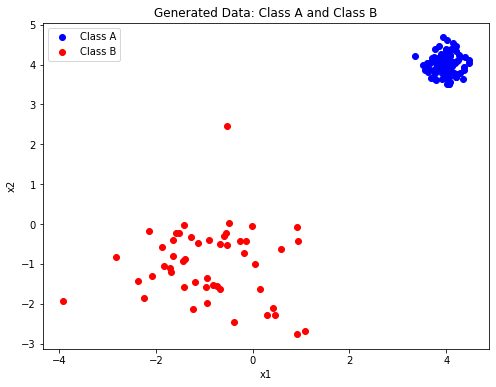

In [999]:
#in summary, this code generates a 2D array of 100 random points
#in 2D space, where each point is normally distributed around the
# mean (4, 4) with a standard deviation of 0.25.
class_A = np.random.normal(loc=(4,4), scale=0.25, size=(100,2))
#This code creates a 1D array of ones with the same number of
#elements as the number of rows in the class_A array.
label_A = np.ones(class_A.shape[0])  # Class A as +1 labels

class_B = np.random.normal(loc=(-1, -1), scale=0.9, size=(50,2))
#label_B = np.zeros(class_B.shape[0])  #Class be should be -1 not 0
label_B = -1 * np.ones(class_B.shape[0])  # Class B as -1


plt.figure(figsize=(8, 6))
plt.scatter(class_A[:, 0], class_A[:, 1], label='Class A', color='blue')
plt.scatter(class_B[:, 0], class_B[:, 1], label='Class B', color='red')
plt.title("Generated Data: Class A and Class B")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

#### Part2: using SSE cost function from linear regression for an linear classification problem:

##### My Own Solution:

In [ ]:
X = np.vstack((class_A, class_B))
y = np.hstack((label_A, label_B))
print(X.shape)
print(y.shape)

def regression_closed_form(X, y):
    #Adding Bias:
    X_with_bias = np.c_[np.ones((len(X), 1)), X]
    #(x^T x)^-1 * y^T * X 
    w = np.dot(inv(np.dot(X_with_bias.transpose(), X_with_bias)), np.dot(y.T, X_with_bias ) ) 
    return w

def print_parameter_vectors(w):
    for i in range(len(w)):
        print(f"w{i} = {w[i]}")

def hypotheses_vector(w, X):
    h = w[0] + w[1] * X[: , 0] + w[2] * X[: , 1]
    return h

#Get parameter vector w
w = regression_closed_form(X, y)
print_parameter_vectors(w)

h = hypotheses_vector(w, X)
print(h.shape)


(150, 2)
(150,)
w0 = -0.5479092812348244
w1 = 0.2005583245409507
w2 = 0.18196077453605908
(150,)


##### Using SkLearn:

In [1002]:
model = LinearRegression()
model.fit(X, y)

w1, w2 = model.coef_  # weights
w0 = model.intercept_  # bias

print(f"Model weights: w1 = {w1:.2f}, w2 = {w2:.2f}, bias = {w0:.2f}")


Model weights: w1 = 0.20, w2 = 0.18, bias = -0.55


##### Plot the fitted line:

(100,)


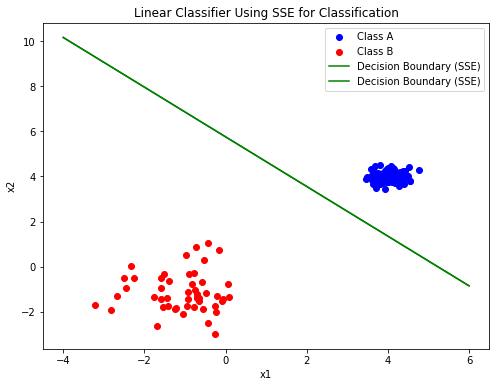

In [1016]:
x_vals = np.linspace(-4, 6, 100)
x_vals_2d = np.column_stack((x_vals, x_vals))


# Plot the decision boundary: w1 * x1 + w2 * x2 + b = 0.5 [Q:why decision boundary should be like so?]
print(x_vals.shape)
decision_boundary = (-w1 * x_vals - w0 + 0.5) / w2

plt.figure(figsize=(8, 6))
plt.scatter(class_A[:, 0], class_A[:, 1], label='Class A', color='blue')
plt.scatter(class_B[:, 0], class_B[:, 1], label='Class B', color='red')
plt.plot(x_vals_2d, decision_boundary, label='Decision Boundary (SSE)', color='green')
plt.title("Linear Classifier Using SSE for Classification")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

### Section2, Implementing a Perceptron Neural Network:

#### Part1: Implement a Perceptron on Generating synthetic data from section1:

In [1018]:
from random import sample
class Perceptron:
    def __init__(self, learning_rate=0.01, n_epochs=1000):
        self.learning_rate = learning_rate
        self.n_epochs      = n_epochs
        self.weights       = None
        self.bias          = None
        self.errors_       = []
    
    def _unit_step(self, x):
        return np.where(x >= 0, 1, -1)

    def fit(self, X, y):
        """
        Train the Perceptron model on the provided data.

        Parameters:
        X : array-like, shape = [n_samples, n_features]
            Training vectors.
        y : array-like, shape = [n_samples]
            Target values. Must be +1 or -1.
        """
        n_samples, n_features = X.shape

        #Starting weights and bias with zero:
        #self.weights = np.zeros(n_features)
        self.weights   = np.random.rand(n_features) 
        self.bias      = 0.00

        for epoch in range(self.n_epochs):
            errors = 0 
            for i in range(n_samples):
                linear_output = np.dot(self.weights, X[i]) + self.bias # w^T x + b
                y_predicted   = self._unit_step(linear_output)
                #Misclassified:
                if y_predicted != y[i]:
                    update        = self.learning_rate * y[i]
                    self.weights += update * X[i]
                    self.bias    += update
                    errors       += 1

            self.errors_.append(errors)

            # if no errors, convergence achieved
            if errors == 0:
                print(f"Converged after {epoch+1} epochs")
                break
    
    def predict(self, X):
        """
        Predict class labels for samples in X.

        Parameters:
        X : array-like, shape = [n_samples, n_features]

        Returns:
        array, shape = [n_samples]
            Predicted class labels.
        """
        linear_output = np.dot(X, self.weights) + self.bias
        return self._unit_step(linear_output)
         

In [1019]:
perceptron = Perceptron(learning_rate=0.01, n_epochs=1000)
perceptron.fit(X, y)

print(f"Final Weights: {perceptron.weights}")
print(f"Final Bias: {perceptron.bias}")


Converged after 9 epochs
Final Weights: [0.52379096 0.2977487 ]
Final Bias: -0.12999999999999998


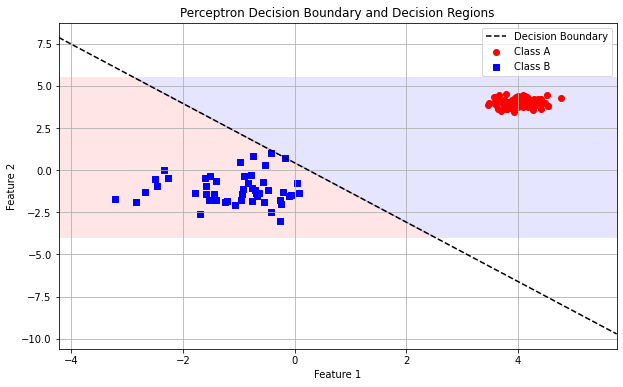

In [1020]:
from matplotlib.colors import ListedColormap

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = perceptron.predict(grid)
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

plt.figure(figsize=(10, 6))

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

if perceptron.weights[1] != 0:
    x_vals = np.array([x_min, x_max])
    y_vals = -(perceptron.weights[0] * x_vals + perceptron.bias) / perceptron.weights[1]
    plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
else:
    x_val = -perceptron.bias / perceptron.weights[0]
    plt.axvline(x=x_val, color='k', linestyle='--', label='Decision Boundary')

plt.scatter(class_A[:, 0], class_A[:, 1], color='red', marker='o', label='Class A')
plt.scatter(class_B[:, 0], class_B[:, 1], color='blue', marker='s', label='Class B')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary and Decision Regions')
plt.legend()
plt.grid(True)
plt.show()
     


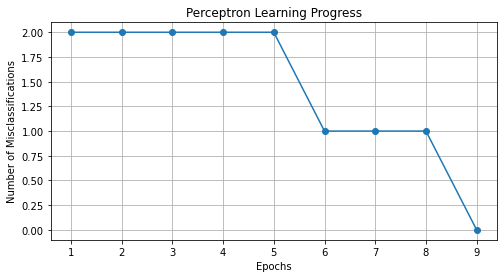

In [1021]:
plt.figure(figsize=(8, 4))
                                                                  #perceptron.errors_[::20]
plt.plot(range(1,len(perceptron.errors_)+1,1), perceptron.errors_[::1], marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.title('Perceptron Learning Progress')
plt.grid(True)
plt.show()


#### Part2: Implement a Perceptron on Linearly Separable Data:

In [1022]:
def generate_ab_class(n_points=1000):
    dataset_A = []
    dataset_B = []
    while len(dataset_A) < n_points or len(dataset_B) < n_points:
        x = np.random.uniform(0, 10)
        y = np.random.uniform(0, 10)
        if y > x and len(dataset_A) < n_points:
            dataset_A.append([x, y])
        elif y < x and len(dataset_B) < n_points:
            dataset_B.append([x, y])
    return np.array(dataset_A), np.array(dataset_B)

class_A_LS, class_B_LS = generate_ab_class()

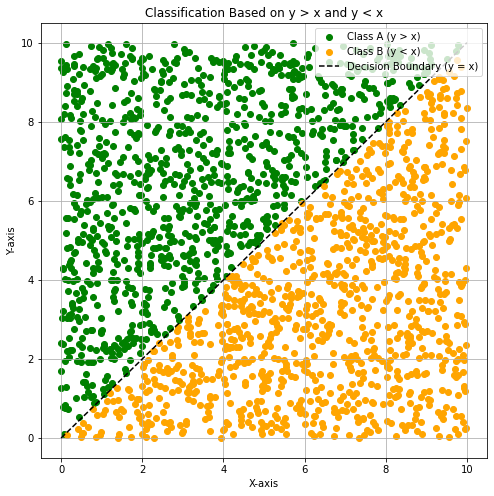

In [1023]:
plt.figure(figsize=(8, 8))
plt.scatter(class_A_LS[:, 0], class_A_LS[:, 1], color='green', label='Class A (y > x)')
plt.scatter(class_B_LS[:, 0], class_B_LS[:, 1], color='orange', label='Class B (y < x)')
plt.plot([0, 10], [0, 10], color='black', linestyle='--', label='Decision Boundary (y = x)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Classification Based on y > x and y < x')
plt.legend()
plt.grid(True)
plt.show()


In [1024]:
#X_ab: combined feature data from class A and class B

X_AB_linear_sep = np.vstack((class_A_LS, class_B_LS))
y_AB_linear_sep = np.hstack( ( np.ones(class_A_LS.shape[0]), -np.ones(class_B_LS.shape[0]) ) )

shuffle_idx = np.random.permutation(len(X_AB_linear_sep))
X_AB_linear_sep, y_AB_linear_sep = X_AB_linear_sep[shuffle_idx], y_AB_linear_sep[shuffle_idx]

print("Combined Data Sample Points:\n", X_AB_linear_sep[:5])
print("Combined Labels:\n", y_AB_linear_sep[:5])


Combined Data Sample Points:
 [[0.72522317 7.03280054]
 [8.42464107 7.22373508]
 [1.21264893 1.13761959]
 [6.54907123 4.42735928]
 [9.3844764  1.71085967]]
Combined Labels:
 [ 1. -1. -1. -1. -1.]


In [1025]:
ls_perceptron = Perceptron(learning_rate=0.01, n_epochs=1000)
ls_perceptron.fit(X_AB_linear_sep, y_AB_linear_sep)

print(f"Final Weights: {ls_perceptron.weights}")
print(f"Final Bias: {ls_perceptron.bias}")


Converged after 15 epochs
Final Weights: [-0.88409228  0.88660779]
Final Bias: -0.009999999999999997


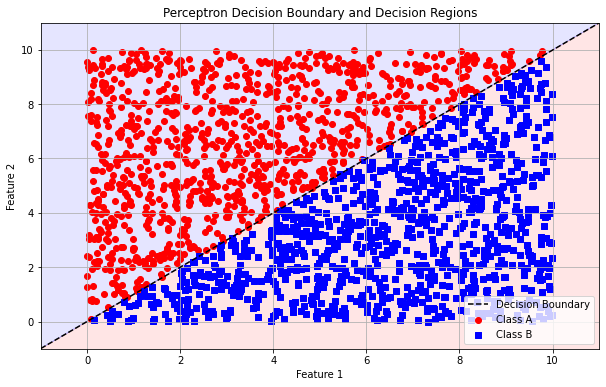

In [1026]:
from matplotlib.colors import ListedColormap

x_min, x_max = X_AB_linear_sep[:, 0].min() - 1, X_AB_linear_sep[:, 0].max() + 1
y_min, y_max = X_AB_linear_sep[:, 1].min() - 1, X_AB_linear_sep[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = ls_perceptron.predict(grid)
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
plt.figure(figsize=(10, 6))

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

if ls_perceptron.weights[1] != 0:
    x_vals = np.array([x_min, x_max])
    y_vals = -(ls_perceptron.weights[0] * x_vals + ls_perceptron.bias) / ls_perceptron.weights[1]
    plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
else:
    x_val = -ls_perceptron.bias / ls_perceptron.weights[0]
    plt.axvline(x=x_val, color='k', linestyle='--', label='Decision Boundary')

plt.scatter(class_A_LS[:, 0], class_A_LS[:, 1], color='red', marker='o', label='Class A')
plt.scatter(class_B_LS[:, 0], class_B_LS[:, 1], color='blue', marker='s', label='Class B')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary and Decision Regions')
plt.legend()
plt.grid(True)
plt.show()
     


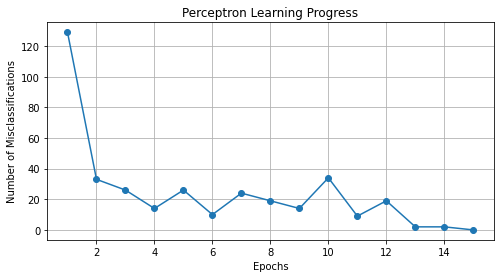

In [1027]:
plt.figure(figsize=(8, 4))
                                                                  #perceptron.errors_[::20]
plt.plot(range(1,len(ls_perceptron.errors_)+1,1), ls_perceptron.errors_[::1], marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.title('Perceptron Learning Progress')
plt.grid(True)
plt.show()

# Q:

## why this perceptron code doesnt converge to zero with this code:
The perceptron algorithm is a simple linear classifier that can converge to a solution under certain conditions. However, there are several reasons why the perceptron code you provided might not converge for some datasets:

1. **Linearly Inseparable Data**: The most common reason for non-convergence is that the data is not linearly separable. The perceptron algorithm can only find a solution if the classes can be separated by a linear boundary. If the data points of different classes cannot be separated by a straight line (or hyperplane in higher dimensions), the perceptron will not converge.

2. **Learning Rate**: The learning rate (`learning_rate`) can affect convergence. If the learning rate is too high, the updates to the weights may overshoot the optimal solution, causing oscillations and preventing convergence. Conversely, if it is too low, convergence may take an excessively long time.

3. **Number of Epochs**: The maximum number of epochs (`n_epochs`) is a limiting factor. If the data is complex or if the learning rate is not optimal, the perceptron may require more epochs to converge than specified. If the maximum number of epochs is reached without convergence, the training will stop.

4. **Data Scaling**: If the features in `X` are not scaled properly, it can lead to poor convergence behavior. Features with very different scales can cause the perceptron to struggle to find a suitable decision boundary.

5. **Initialization of Weights**: The weights are initialized to zero in your implementation. While this is common, it can sometimes lead to issues, especially if the data is not centered around zero. Random initialization of weights can sometimes help in certain scenarios.

6. **Class Labels**: The perceptron expects the target values (`y`) to be either +1 or -1. If the labels are not in this format (e.g., 0 and 1), the perceptron will not function correctly. Ensure that the labels are correctly formatted.

7. **Data Quality**: Noisy data or outliers can also affect the convergence of the perceptron. If there are many misclassified points due to noise, the perceptron may struggle to find a stable solution.

### Recommendations
- **Check for Linear Separability**: Visualize your data to see if it is linearly separable.
- **Adjust Learning Rate**: Experiment with different learning rates to see if it affects convergence.
- **Increase Epochs**: If you suspect that the model needs more time to converge, increase the number of epochs.
- **Scale Your Data**: Consider normalizing or standardizing your features.
- **Random Initialization**: Try initializing weights randomly instead of starting with zeros.
- **Verify Labels**: Ensure that your target labels are in the correct format (+1 and -1).

By addressing these factors, you may improve the convergence behavior of your perceptron implementation.

## why decision boundary should be like so?
The decision boundary in a linear classification problem is the line (or hyperplane in higher dimensions) that separates different classes in the feature space. The equation of the decision boundary is derived from the linear model used for classification. Let's break down why the decision boundary is formulated the way it is.

### Linear Model

In a linear regression or linear classification context, we typically model the relationship between the input features $X$ and the output $y$ using a linear equation:

$$
y = w_0 + w_1 \cdot x_1 + w_2 \cdot x_2
$$

Where:
- $w_0$ is the bias (intercept).
- $w_1$ and $w_2$ are the weights associated with the features $x_1$ and $x_2$.

### Decision Boundary

For binary classification, we want to classify the data points into two classes, say Class A and Class B. The decision boundary is defined as the set of points where the model predicts a certain threshold. In many cases, this threshold is set to 0.5, which means we want to find the points where the model's output is equal to 0.5.

To find the decision boundary, we set the output of the linear model to 0.5:

$$
0.5 = w_0 + w_1 \cdot x_1 + w_2 \cdot x_2
$$

Rearranging this equation gives us the equation of the decision boundary:

$$
w_2 \cdot x_2 = 0.5 - w_0 - w_1 \cdot x_1
$$

Dividing through by $w_2$ (assuming $w_2 \neq 0$) gives:


$$ x_2 = \frac{0.5 - w_0 - w_1 \cdot x_1}{w_2}$$


### Interpretation

- **Slope and Intercept**: The equation of the decision boundary can be interpreted as a line in a 2D space (or a hyperplane in higher dimensions). The coefficients $w_1$ and $w_2$ determine the slope of the line, while $w_0$ (the bias) shifts the line up or down.
- **Separation of Classes**: Points above the decision boundary are classified as one class (e.g., Class A), and points below are classified as the other class (e.g., Class B). The decision boundary is where the model is uncertain, as it is the point where the predicted probability of belonging to either class is equal.

### Conclusion

The decision boundary is crucial for understanding how a linear classifier makes predictions. By setting the output of the linear model to a specific threshold (like 0.5), we can derive the equation that defines the boundary between the classes. This is why the decision boundary is formulated in the way it is, and it is essential for visualizing how well the model separates the different classes in the feature space.

The choice of using 0.5 as the threshold for the decision boundary in binary classification is based on the interpretation of the output of a linear model (or logistic regression model) as a probability. Here’s a detailed explanation of why 0.5 is commonly used:

### 1. **Binary Classification Context**

In binary classification, we typically have two classes, which we can denote as Class 0 and Class 1 (or Class A and Class B). The goal of the classifier is to assign a label to each input based on its features.

### 2. **Probability Interpretation**

When using a linear model (or logistic regression), the output can be interpreted as a score or a log-odds ratio. In the case of logistic regression, the output is transformed into a probability using the logistic (sigmoid) function:

$$
P(y=1 | X) = \frac{1}{1 + e^{-(w_0 + w_1 \cdot x_1 + w_2 \cdot x_2)}}
$$

Where:
- $P(y=1 | X)$ is the probability that the input $X$ belongs to Class 1.
- The expression $w_0 + w_1 \cdot x_1 + w_2 \cdot x_2$ is the linear combination of the input features.

### 3. **Threshold for Classification**

To make a classification decision based on the probability, we need to set a threshold. The most common threshold is 0.5, which means:

- If $P(y=1 | X) \geq 0.5$, we classify the input as Class 1.
- If $P(y=1 | X) < 0.5$, we classify the input as Class 0.

### 4. **Why 0.5?**

- **Equal Likelihood**: A threshold of 0.5 represents a point of equal likelihood for the two classes. At this threshold, the model is uncertain about which class the input belongs to, as it predicts equal probabilities for both classes.
- **Balanced Decision**: Using 0.5 as a threshold provides a balanced decision point. It minimizes the risk of misclassification when the classes are roughly balanced in the dataset.
- **Interpretability**: A threshold of 0.5 is intuitive and easy to understand. It simplifies the decision-making process, as it directly relates to the probability interpretation.

### 5. **Alternative Thresholds**

While 0.5 is the most common threshold, it is not the only one. Depending on the specific problem, the distribution of classes, or the cost of misclassification, you might choose a different threshold. For example:

- If one class is much more prevalent than the other, you might lower the threshold to increase sensitivity (true positive rate).
- If false positives are particularly costly, you might raise the threshold to reduce the number of false positives.

### Conclusion

In summary, the use of 0.5 as the threshold for the decision boundary in binary classification is based on the interpretation of the model's output as a probability. It represents a point of equal likelihood for the two classes, making it a natural choice for classification decisions. However, the threshold can be adjusted based on the specific requirements of the problem at hand.

Sure! Let's go through a numerical illustration to clarify how the decision boundary is determined using a threshold of 0.5 in a binary classification context.

### Example Scenario

Suppose we have a simple dataset with two features, $x_1$ and $x_2$, and we want to classify points into two classes: Class 0 and Class 1.

#### Sample Data Points

| Point | $x_1$ | $x_2$ | Class |
|-------|---------|---------|-------|
| A     | 1       | 2       | 0     |
| B     | 2       | 3       | 0     |
| C     | 3       | 3       | 1     |
| D     | 4       | 5       | 1     |

### Step 1: Fit a Linear Model

Let's say we fit a linear model to this data and obtain the following weights:

- $w_0 = -1$ (bias)
- $w_1 = 1$
- $w_2 = 1$

The linear equation for the model can be expressed as:

$$
y = w_0 + w_1 \cdot x_1 + w_2 \cdot x_2
$$

Substituting the weights, we have:

$$
y = -1 + 1 \cdot x_1 + 1 \cdot x_2 = x_1 + x_2 - 1
$$

### Step 2: Calculate Probabilities

To classify a new point, we can calculate the output of the model and interpret it as a probability. For example, let's classify the following points:

1. **Point E**: $x_1 = 2$, $x_2 = 2$
2. **Point F**: $x_1 = 3$, $x_2 = 4$

#### For Point E:

$$
y_E = 2 + 2 - 1 = 3
$$

To convert this to a probability using the logistic function (if we were using logistic regression), we would use:

$$
P(y=1 | X) = \frac{1}{1 + e^{-y_E}} = \frac{1}{1 + e^{-3}} \approx 0.9526
$$

Since $P(y=1 | X) \approx 0.9526$ is greater than 0.5, we classify Point E as **Class 1**.

#### For Point F:

$$
y_F = 3 + 4 - 1 = 6
$$

Calculating the probability:

$$
P(y=1 | X) = \frac{1}{1 + e^{-y_F}} = \frac{1}{1 + e^{-6}} \approx 0.9975
$$

Since $P(y=1 | X) \approx 0.9975$ is also greater than 0.5, we classify Point F as **Class 1**.

### Step 3: Determine the Decision Boundary

To find the decision boundary, we set the output of the model equal to 0.5:

$$
0.5 = w_0 + w_1 \cdot x_1 + w_2 \cdot x_2
$$

Substituting the weights:

$$
0.5 = -1 + 1 \cdot x_1 + 1 \cdot x_2
$$

Rearranging gives:

$$
x_1 + x_2 = 1.5
$$

This equation represents the decision boundary. Any point that satisfies this equation will be on the boundary. Points above this line will be classified as Class 1, and points below will be classified as Class 0.

### Step 4: Visualizing the Decision Boundary

If we plot the points and the decision boundary $x_1 + x_2 = 1.5$, we can see how the classes are separated:

- Points A and B (Class 0) are below the line.
- Points C and D (Class 1) are above the line.
- Points E and F, which we classified, are also above the line.

### Conclusion

In this numerical illustration, we see how the decision boundary is derived from the linear model and how the threshold of 0.5 is used to classify new points. The decision boundary separates the two classes based on the model's output, and points above the boundary are classified as Class 1, while those below are classified as Class 0. This example helps clarify the concept of using a threshold in binary classification.

Let's consider a real-world example of a binary classification problem: predicting whether a student will pass or fail an exam based on the number of hours they studied and their previous exam scores.

### Example Scenario

#### Dataset

Suppose we have the following dataset of students:

| Student | Hours Studied | Previous Exam Score | Pass (1) / Fail (0) |
|---------|---------------|---------------------|----------------------|
| A       | 1             | 50                  | 0                    |
| B       | 2             | 55                  | 0                    |
| C       | 3             | 70                  | 1                    |
| D       | 4             | 80                  | 1                    |
| E       | 5             | 90                  | 1                    |

### Step 1: Fit a Linear Model

We want to predict whether a student will pass (1) or fail (0) based on the number of hours they studied and their previous exam score. We can fit a linear regression model to this data and obtain the following weights:

- $w_0 = -4$ (bias)
- $w_1 = 1$ (weight for Hours Studied)
- $w_2 = 0.05$ (weight for Previous Exam Score)

The linear equation for the model can be expressed as:

$$
y = w_0 + w_1 \cdot \text{Hours Studied} + w_2 \cdot \text{Previous Exam Score}
$$

Substituting the weights, we have:

$$
y = -4 + 1 \cdot \text{Hours Studied} + 0.05 \cdot \text{Previous Exam Score}
$$

### Step 2: Calculate Probabilities

To classify a new student, we can calculate the output of the model and interpret it as a probability. Let's classify the following students:

1. **Student F**: Hours Studied = 3, Previous Exam Score = 75
2. **Student G**: Hours Studied = 2, Previous Exam Score = 60

#### For Student F:

$$
y_F = -4 + 1 \cdot 3 + 0.05 \cdot 75
$$
$$
y_F = -4 + 3 + 3.75 = 2.75
$$

To convert this to a probability using the logistic function (if we were using logistic regression), we would use:

$$
P(\text{Pass} | X) = \frac{1}{1 + e^{-y_F}} = \frac{1}{1 + e^{-2.75}} \approx 0.940
$$

Since $P(\text{Pass} | X) \approx 0.940$ is greater than 0.5, we classify Student F as **Pass (1)**.

#### For Student G:

$$
y_G = -4 + 1 \cdot 2 + 0.05 \cdot 60
$$
$$
y_G = -4 + 2 + 3 = 1
$$

Calculating the probability:

$$
P(\text{Pass} | X) = \frac{1}{1 + e^{-y_G}} = \frac{1}{1 + e^{-1}} \approx 0.731
$$

Since $P(\text{Pass} | X) \approx 0.731$ is also greater than 0.5, we classify Student G as **Pass (1)**.

### Step 3: Determine the Decision Boundary

To find the decision boundary, we set the output of the model equal to 0.5:

$$
0.5 = w_0 + w_1 \cdot \text{Hours Studied} + w_2 \cdot \text{Previous Exam Score}
$$

Substituting the weights:

$$
0.5 = -4 + 1 \cdot \text{Hours Studied} + 0.05 \cdot \text{Previous Exam Score}
$$

Rearranging gives:

$$
1 \cdot \text{Hours Studied} + 0.05 \cdot \text{Previous Exam Score} = 4.5
$$

This equation represents the decision boundary. Any point that satisfies this equation will be on the boundary. Points above this line will be classified as Pass (1), and points below will be classified as Fail (0).

### Step 4: Visualizing the Decision Boundary

If we plot the points and the decision boundary $1 \cdot \text{Hours Studied} + 0.05 \cdot \text{Previous Exam Score} = 4.5$, we can see how the classes are separated:

- Students A and B (Fail) are below the line.
- Students C, D,


### Step 4: Visualizing the Decision Boundary (Continued)

To visualize the decision boundary, we can plot the data points of the students along with the line that represents the decision boundary. The equation we derived for the decision boundary is:

$$
\text{Hours Studied} + 0.05 \cdot \text{Previous Exam Score} = 4.5
$$

We can rearrange this equation to express $ \text{Previous Exam Score} $ in terms of $ \text{Hours Studied} $:

$$
\text{Previous Exam Score} = \frac{4.5 - \text{Hours Studied}}{0.05}
$$

This means that for any given number of hours studied, we can calculate the corresponding previous exam score that would place a student on the decision boundary.

### Example Points on the Decision Boundary

Let's calculate a few points on the decision boundary:

1. **If Hours Studied = 0**:
   $$
   \text{Previous Exam Score} = \frac{4.5 - 0}{0.05} = 90
   $$

2. **If Hours Studied = 2**:
   $$
   \text{Previous Exam Score} = \frac{4.5 - 2}{0.05} = 50
   $$

3. **If Hours Studied = 4**:
   $$
   \text{Previous Exam Score} = \frac{4.5 - 4}{0.05} = 10
   $$

### Plotting the Data

Now, we can plot the students' data points and the decision boundary. Here’s how the plot would look conceptually:

- **X-axis**: Hours Studied
- **Y-axis**: Previous Exam Score
- **Data Points**: 
  - Class 0 (Fail): Students A (1, 50), B (2, 55)
  - Class 1 (Pass): Students C (3, 70), D (4, 80), E (5, 90)
- **Decision Boundary**: The line calculated from the equation above.

### Visualization Code Example

If you were to implement this in Python using Matplotlib, it might look something like this:

```python
import numpy as np
import matplotlib.pyplot as plt

# Sample data
students = {
    'A': (1, 50, 0),
    'B': (2, 55, 0),
    'C': (3, 70, 1),
    'D': (4, 80, 1),
    'E': (5, 90, 1)
}

# Extracting data
hours_studied = np.array([students[student][0] for student in students])
previous_scores = np.array([students[student][1] for student in students])
labels = np.array([students[student][2] for student in students])

# Plotting the data points
plt.figure(figsize=(10, 6))
plt.scatter(hours_studied[labels == 0], previous_scores[labels == 0], color='red', label='Fail (0)')
plt.scatter(hours_studied[labels == 1], previous_scores[labels == 1], color='green', label='Pass (1)')

# Decision boundary
x_vals = np.linspace(0, 6, 100)
y_vals = (4.5 - x_vals) / 0.05  # Rearranged decision boundary equation

plt.plot(x_vals, y_vals, color='blue', label='Decision Boundary', linestyle='--')

# Labels and title
plt.title('Student Exam Pass/Fail Prediction')
plt.xlabel('Hours Studied')
plt.ylabel('Previous Exam Score')
plt.xlim(0, 6)
plt.ylim(0, 100)
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()
```

### Interpretation of the Plot

- **Data Points**: The red points represent students who failed, while the green points represent students who passed.
- **Decision Boundary**: The dashed blue line represents the decision boundary. Students above this line are predicted to pass, while those below are predicted to fail.
- **Classification**: For new students, you can determine their classification by checking whether their point lies above or below the decision boundary.

### Conclusion

In this real-world example, we demonstrated how to use a linear model to predict whether a student will pass or fail an exam based on their study hours and previous exam scores. By fitting a linear model, calculating probabilities

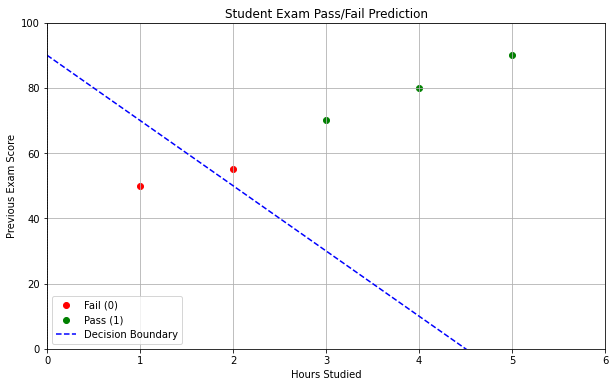

In [1028]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
students = {
    'A': (1, 50, 0),
    'B': (2, 55, 0),
    'C': (3, 70, 1),
    'D': (4, 80, 1),
    'E': (5, 90, 1)
}

# Extracting data
hours_studied = np.array([students[student][0] for student in students])
previous_scores = np.array([students[student][1] for student in students])
labels = np.array([students[student][2] for student in students])

# Plotting the data points
plt.figure(figsize=(10, 6))
plt.scatter(hours_studied[labels == 0], previous_scores[labels == 0], color='red', label='Fail (0)')
plt.scatter(hours_studied[labels == 1], previous_scores[labels == 1], color='green', label='Pass (1)')

# Decision boundary
x_vals = np.linspace(0, 6, 100)
y_vals = (4.5 - x_vals) / 0.05  # Rearranged decision boundary equation

plt.plot(x_vals, y_vals, color='blue', label='Decision Boundary', linestyle='--')

# Labels and title
plt.title('Student Exam Pass/Fail Prediction')
plt.xlabel('Hours Studied')
plt.ylabel('Previous Exam Score')
plt.xlim(0, 6)
plt.ylim(0, 100)
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()